In [1]:
import pandas as pd
import numpy as np
from itertools import combinations

In [2]:
# base_1 = pd.read_csv('datasets/viral50.csv')
# base_1.head()


In [3]:
df = pd.read_csv('datasets/top200.csv')
df.head()

,Unnamed: 0,title,rank,date,artist,url,region,chart,trend,streams,Data
0,63293,Stay Gold,68,2021-07-01,BTS,https://open.spotify.com/track/3Ys2PYl1wyPKQIw...,Japan,top200,MOVE_DOWN,54393.0,2021-07-01
1,478448,Poblado - Remix,104,2021-10-15,"J Balvin, KAROL G, Nicky Jam, Crissin, Totoy E...",https://open.spotify.com/track/2K1CQMoG2Dy5nme...,Spain,top200,MOVE_DOWN,69591.0,2021-10-15
2,478449,"No Me Conocen (Remix) [con DUKI, Rei & Tiago PZK]",105,2021-10-15,BANDIDO,https://open.spotify.com/track/7COGuXyTr12Kvda...,Spain,top200,MOVE_UP,68464.0,2021-10-15
3,478450,Wow Wow (feat. Becky G),106,2021-10-15,Maria Becerra,https://open.spotify.com/track/4Yip3hds5IHyT7A...,Spain,top200,MOVE_UP,67187.0,2021-10-15
4,478451,40 NOCHES,107,2021-10-15,"Recycled J, Selecta",https://open.spotify.com/track/64tFEyCfMQjRsp7...,Spain,top200,MOVE_DOWN,67168.0,2021-10-15


In [4]:
df.drop(['Unnamed: 0','date', 'url','chart','trend', 'streams'], axis=1)

,title,rank,artist,region,Data
0,Stay Gold,68,BTS,Japan,2021-07-01
1,Poblado - Remix,104,"J Balvin, KAROL G, Nicky Jam, Crissin, Totoy E...",Spain,2021-10-15
2,"No Me Conocen (Remix) [con DUKI, Rei & Tiago PZK]",105,BANDIDO,Spain,2021-10-15
3,Wow Wow (feat. Becky G),106,Maria Becerra,Spain,2021-10-15
4,40 NOCHES,107,"Recycled J, Selecta",Spain,2021-10-15
...,...,...,...,...,...
4435037,Sao Em Lại Tắt Máy?,196,"Phạm Nguyên Ngọc, Vanh",Vietnam,2021-10-31
4435038,I Love You 3000,197,Stephanie Poetri,Vietnam,2021-10-31
4435039,Stuck with U (with Justin Bieber),198,Ariana Grande,Vietnam,2021-10-31
4435040,2 5,199,Táo,Vietnam,2021-10-31


In [5]:
dic = {}
for pais in df.region.unique():
    lista_artistas = df[df.region==pais].artist.value_counts()
    dic[pais]= lista_artistas
#     print('{} tem {} artistas'.format(pais,len(lista_artistas)))

In [6]:
def similaridade(dupla):
    pais1= dupla[0]
    pais2= dupla[1]
    a = 0
    for artista in dic[pais1].index:
        try:
            a+= dic[pais2][artista] + dic[pais1][artista]
        except KeyError:
            pass
    return a 

In [7]:
df2 = pd.DataFrame(columns=['pais_1', 'pais_2', 'valor'])
pares = list(combinations(dic.keys(), 2))
for dupla in pares:
    new_row = {'pais_1':dupla[0], 'pais_2':dupla[1], 'valor':similaridade(dupla)}
    df2 = df2.append(new_row, ignore_index=True)
#     df2.append([dupla[0],dupla[1],similaridade(dupla)])
df2

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_row, ignore_index=True)
/tmp/ipykernel_172/1530539719.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ver

,pais_1,pais_2,valor
0,Japan,Spain,17019
1,Japan,Hungary,24356
2,Japan,Iceland,19747
3,Japan,Belgium,26375
4,Japan,Bolivia,19704
...,...,...,...
2341,United States,Vietnam,48003
2342,United States,Luxembourg,38047
2343,Uruguay,Vietnam,26672
2344,Uruguay,Luxembourg,12725


In [8]:
a = list(df2.valor)
df2['normalizado']= [(float(i)-min(a))/(max(a)-min(a)) for i in a]
df2
# type((df2.valor -df2.valor.mean())/df2.valor.std())

,pais_1,pais_2,valor,normalizado
0,Japan,Spain,17019,0.082640
1,Japan,Hungary,24356,0.139718
2,Japan,Iceland,19747,0.103862
3,Japan,Belgium,26375,0.155424
4,Japan,Bolivia,19704,0.103528
...,...,...,...,...
2341,United States,Vietnam,48003,0.323677
2342,United States,Luxembourg,38047,0.246225
2343,Uruguay,Vietnam,26672,0.157735
2344,Uruguay,Luxembourg,12725,0.049236


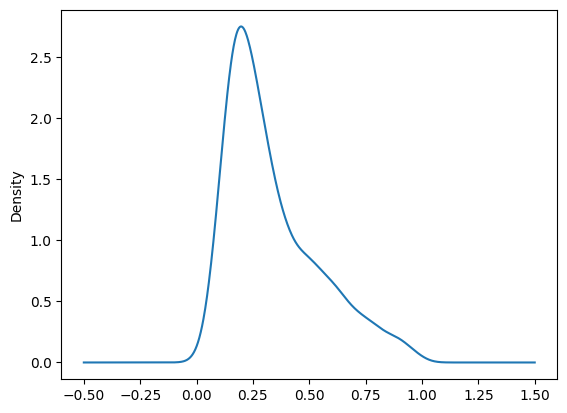

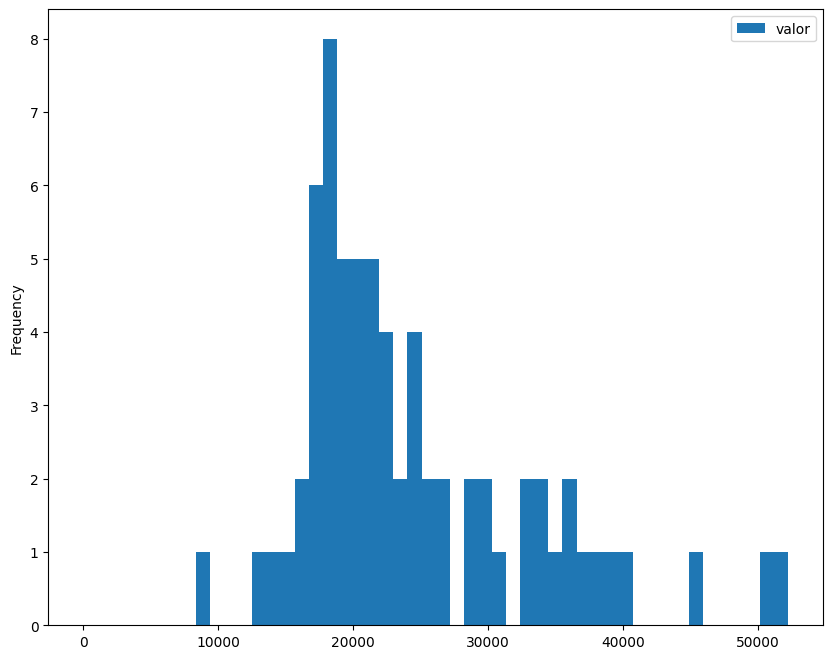

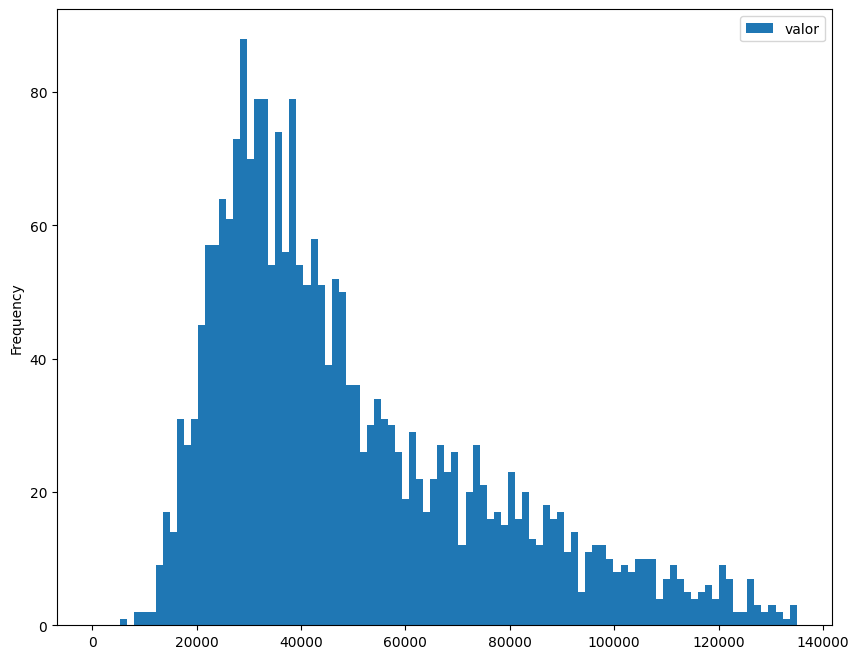

In [9]:
ax3 = df2.normalizado.plot.kde()
ax1 = df2[df2.pais_1 == 'Japan'].plot.hist(column=["valor"], figsize=(10, 8), bins=50)
ax2 = df2.plot.hist(column=["valor"], figsize=(10, 8), bins=100)


In [10]:
from netpixi.integration.gt import *
import netpixi

In [11]:
g = Graph(directed=False) # não-dirigido
k = 0
for e in df.region.unique():
    g.add_vertex(e)
    k+=1
print(k)
k=0
for index, row in df2.iterrows():
    if row[3]>=0.25:
        k+=1
        g.add_edge(row[0], row[1])
gt_save(g, 'projeto.net.gz')
print(k)

69
1310


In [20]:
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'projeto.net.gz')
r = netpixi.render('projeto.net.gz',infinite=True);

In [21]:
r.vertex_set_key('id')